In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
from yahoofinancials import YahooFinancials

In [4]:
yahoo_financials = YahooFinancials('TSLA')
data = yahoo_financials.get_historical_price_data(start_date='2010-01-01', 
                                                   end_date='2023-03-15', 
                                                   time_interval='daily')

df_tsla = pd.DataFrame(data['TSLA']['prices'])
 
df_tsla = df_tsla.drop('date', axis=1).set_index('formatted_date')
df_tsla.head(100)
                                                   

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2010-06-29,1.666667,1.169333,1.266667,1.592667,281494500,1.592667
2010-06-30,2.028000,1.553333,1.719333,1.588667,257806500,1.588667
2010-07-01,1.728000,1.351333,1.666667,1.464000,123282000,1.464000
2010-07-02,1.540000,1.247333,1.533333,1.280000,77097000,1.280000
2010-07-06,1.333333,1.055333,1.333333,1.074000,103003500,1.074000
...,...,...,...,...,...,...
2010-11-11,1.940000,1.822000,1.906667,1.869333,29179500,1.869333
2010-11-12,2.033333,1.871333,1.883333,1.989333,40936500,1.989333
2010-11-15,2.196000,2.014667,2.014667,2.053333,39343500,2.053333


In [5]:
df_tsla.tail()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2023-03-08,186.500000,180.000000,185.039993,182.000000,151897800,182.000000
2023-03-09,185.179993,172.509995,180.250000,172.919998,170023800,172.919998
2023-03-10,178.289993,168.440002,175.130005,173.440002,191007900,173.440002
2023-03-13,177.350006,163.910004,167.460007,174.479996,167790300,174.479996
2023-03-14,183.800003,177.139999,177.309998,183.259995,143717900,183.259995


# Simple Moving Average

<AxesSubplot: xlabel='formatted_date'>

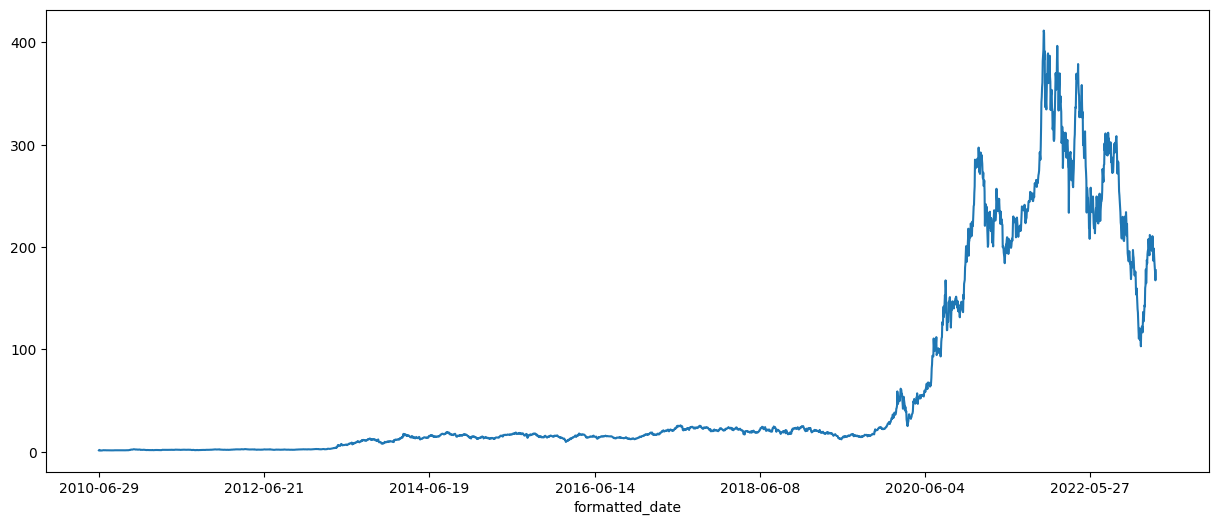

In [6]:
df_tsla['open'].plot(figsize=(15,6))

In [7]:
df_tsla['open:10 days rolling'] = df_tsla['open'].rolling(window=10,min_periods=1).mean()


KeyError: "['open : 10 days rolling'] not found in axis"

In [9]:
df_tsla

,high,low,open,close,volume,adjclose,open:10 days rolling
formatted_date,,,,,,,
2010-06-29,1.666667,1.169333,1.266667,1.592667,281494500,1.592667,1.266667
2010-06-30,2.028000,1.553333,1.719333,1.588667,257806500,1.588667,1.493000
2010-07-01,1.728000,1.351333,1.666667,1.464000,123282000,1.464000,1.550889
2010-07-02,1.540000,1.247333,1.533333,1.280000,77097000,1.280000,1.546500
2010-07-06,1.333333,1.055333,1.333333,1.074000,103003500,1.074000,1.503867
...,...,...,...,...,...,...,...
2023-03-08,186.500000,180.000000,185.039993,182.000000,151897800,182.000000,197.557001
2023-03-09,185.179993,172.509995,180.250000,172.919998,170023800,172.919998,195.191000
2023-03-10,178.289993,168.440002,175.130005,173.440002,191007900,173.440002,193.071001


<AxesSubplot: xlabel='formatted_date'>

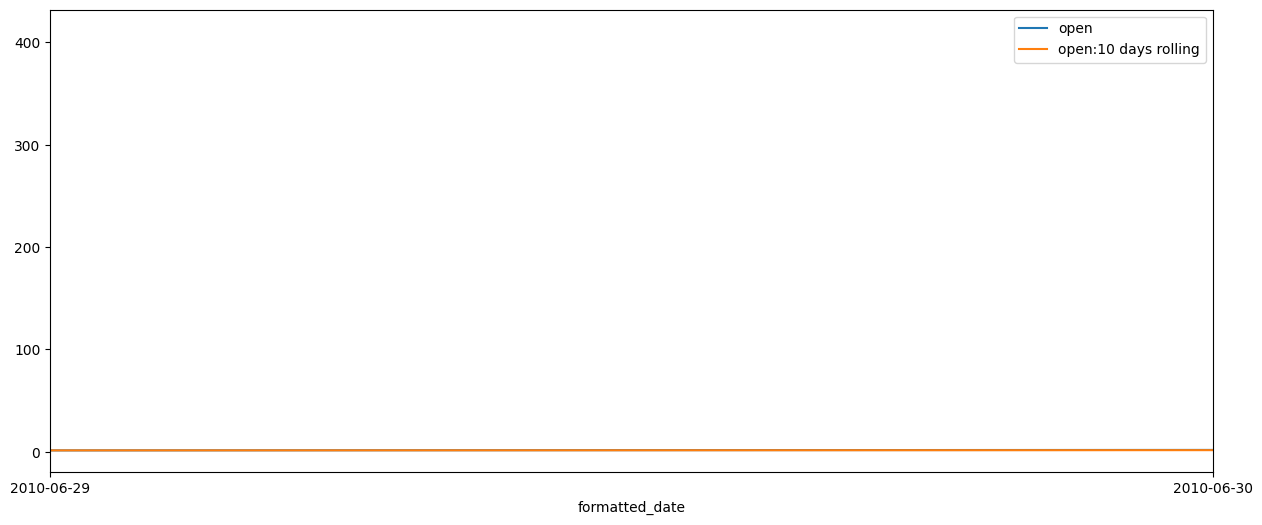

In [15]:
df_tsla[['open','open:10 days rolling']].plot(figsize=(15,6))

In [11]:
df_tsla['open:30 days rolling'] = df_tsla['open'].rolling(window=30,min_periods=1).mean()

In [12]:
df_tsla['open:50 days rolling'] = df_tsla['open'].rolling(window=50,min_periods=1).mean()

In [13]:
df_tsla

,high,low,open,close,volume,adjclose,open:10 days rolling,open:30 days rolling,open:50 days rolling
formatted_date,,,,,,,,,
2010-06-29,1.666667,1.169333,1.266667,1.592667,281494500,1.592667,1.266667,1.266667,1.266667
2010-06-30,2.028000,1.553333,1.719333,1.588667,257806500,1.588667,1.493000,1.493000,1.493000
2010-07-01,1.728000,1.351333,1.666667,1.464000,123282000,1.464000,1.550889,1.550889,1.550889
2010-07-02,1.540000,1.247333,1.533333,1.280000,77097000,1.280000,1.546500,1.546500,1.546500
2010-07-06,1.333333,1.055333,1.333333,1.074000,103003500,1.074000,1.503867,1.503867,1.503867
...,...,...,...,...,...,...,...,...,...
2023-03-08,186.500000,180.000000,185.039993,182.000000,151897800,182.000000,197.557001,191.167667,163.379600
2023-03-09,185.179993,172.509995,180.250000,172.919998,170023800,172.919998,195.191000,192.445667,164.457200
2023-03-10,178.289993,168.440002,175.130005,173.440002,191007900,173.440002,193.071001,192.951000,165.609800


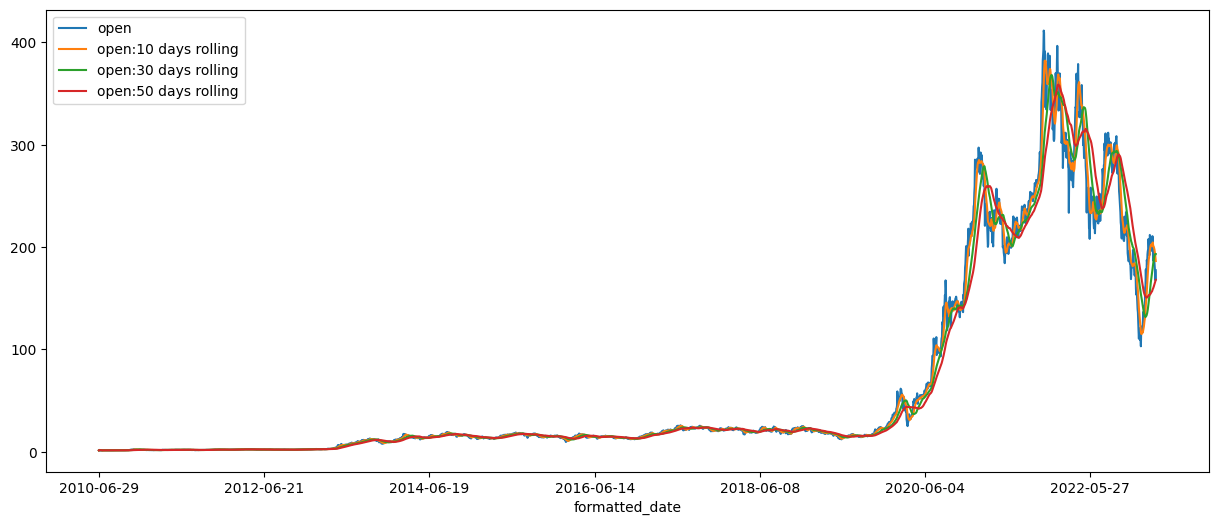

In [22]:
plot1 = df_tsla[['open','open:10 days rolling','open:30 days rolling','open:50 days rolling']].plot(figsize=(15,6))

<AxesSubplot: xlabel='formatted_date'>

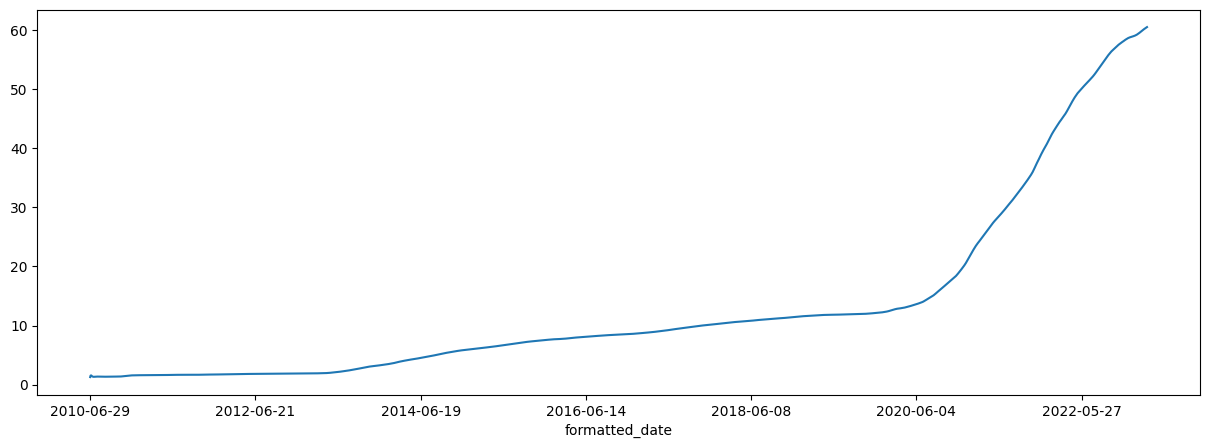

In [17]:
df_tsla['open'].expanding().mean().plot(figsize=(15,5))

In [18]:
df_tsla.to_csv('tesla.csv')

#exponential moving average

In [19]:
df_tsla['EMA_0.1'] = df_tsla['open'].ewm(alpha=0.1,adjust=False).mean()

In [25]:
df_tsla

,high,low,open,close,volume,adjclose,open:10 days rolling,open:30 days rolling,open:50 days rolling,EMA_0.1,EMA_0.3
formatted_date,,,,,,,,,,,
2010-06-29,1.666667,1.169333,1.266667,1.592667,281494500,1.592667,1.266667,1.266667,1.266667,1.266667,1.266667
2010-06-30,2.028000,1.553333,1.719333,1.588667,257806500,1.588667,1.493000,1.493000,1.493000,1.311934,1.402467
2010-07-01,1.728000,1.351333,1.666667,1.464000,123282000,1.464000,1.550889,1.550889,1.550889,1.347407,1.481727
2010-07-02,1.540000,1.247333,1.533333,1.280000,77097000,1.280000,1.546500,1.546500,1.546500,1.366000,1.497209
2010-07-06,1.333333,1.055333,1.333333,1.074000,103003500,1.074000,1.503867,1.503867,1.503867,1.362733,1.448046
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-08,186.500000,180.000000,185.039993,182.000000,151897800,182.000000,197.557001,191.167667,163.379600,193.205309,192.760299
2023-03-09,185.179993,172.509995,180.250000,172.919998,170023800,172.919998,195.191000,192.445667,164.457200,191.909778,189.007210
2023-03-10,178.289993,168.440002,175.130005,173.440002,191007900,173.440002,193.071001,192.951000,165.609800,190.231800,184.844048


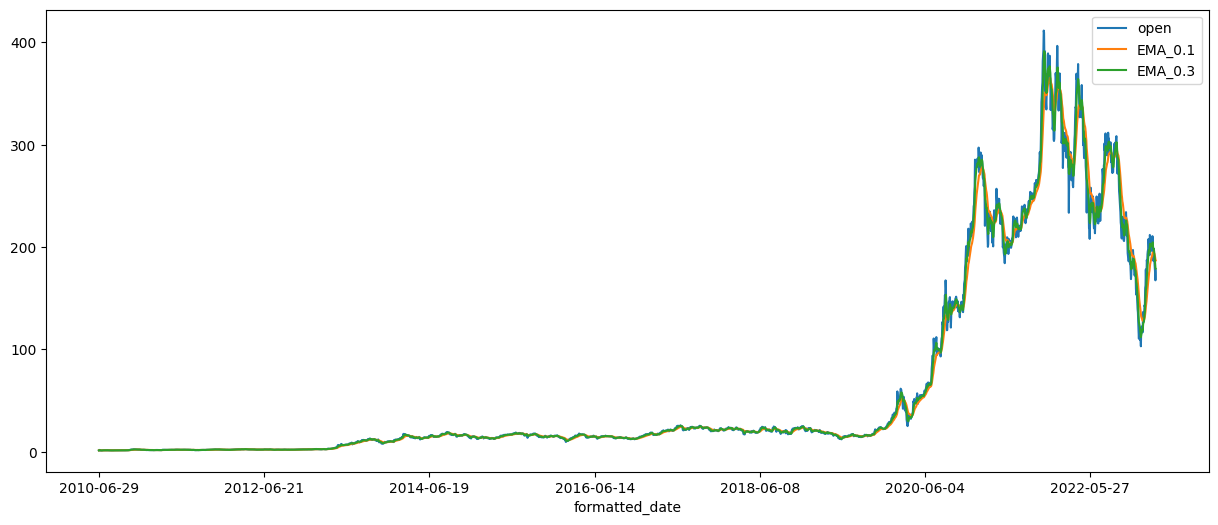

In [26]:
plot2 = df_tsla[['open','EMA_0.1','EMA_0.3']].plot(figsize=(15,6))

In [24]:
df_tsla['EMA_0.3'] = df_tsla['open'].ewm(alpha=0.3,adjust=False).mean()